To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News

**Read our [Gemma 3 blog](https://unsloth.ai/blog/gemma3) for what's new in Unsloth and our [Reasoning blog](https://unsloth.ai/blog/r1-reasoning) on how to train reasoning models.**

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [ ]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl==0.15.2 triton cut_cross_entropy # unsloth_zoo
    !pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
    !pip install --no-deps unsloth==2025.4.4

In [ ]:
!pip uninstall -y unsloth_zoo

!pip install git+https://github.com/rupaut98/unsloth-zoo.git@fix-gemma-vision

  Cloning https://github.com/rupaut98/unsloth-zoo.git (to revision fix-gemma-vision) to /tmp/pip-req-build-7ka5xy9h
  Running command git clone --filter=blob:none --quiet https://github.com/rupaut98/unsloth-zoo.git /tmp/pip-req-build-7ka5xy9h
  Running command git checkout -b fix-gemma-vision --track origin/fix-gemma-vision
  Switched to a new branch 'fix-gemma-vision'
  Branch 'fix-gemma-vision' set up to track remote branch 'fix-gemma-vision' from 'origin'.
  Resolved https://github.com/rupaut98/unsloth-zoo.git to commit 4892f36fc8d2d85313a5a0a4a5f4a5f4a2937205
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 M

In [ ]:
!pip install natsort

# Configuration

In [ ]:
MAX_SEQ_LENGTH = 16000

In [ ]:
import unsloth
unsloth.__version__

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch SmolVLMForConditionalGeneration forward function.
🦥 Unsloth Zoo will now patch everything to make training faster!


'2025.4.4'

### Unsloth

In [ ]:
from unsloth.models.mapper import MAP_TO_UNSLOTH_16bit

In [ ]:
"unsloth/gemma-3-4b-it-bnb-4bit" in MAP_TO_UNSLOTH_16bit

True

In [ ]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit", # Llama 3.2 vision support
    "unsloth/Llama-3.2-11B-Vision-bnb-4bit",
    "unsloth/Llama-3.2-90B-Vision-Instruct-bnb-4bit", # Can fit in a 80GB card!
    "unsloth/Llama-3.2-90B-Vision-bnb-4bit",

    "unsloth/Pixtral-12B-2409-bnb-4bit",              # Pixtral fits in 16GB!
    "unsloth/Pixtral-12B-Base-2409-bnb-4bit",         # Pixtral base model

    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",          # Qwen2 VL support
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    "unsloth/Qwen2-VL-72B-Instruct-bnb-4bit",

    "unsloth/llava-v1.6-mistral-7b-hf-bnb-4bit",      # Any Llava variant works!
    "unsloth/llava-1.5-7b-hf-bnb-4bit",
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
    max_seq_length=MAX_SEQ_LENGTH
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch SmolVLMForConditionalGeneration forward function.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.4.4: Fast Gemma3 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
from natsort import natsorted
test = ["eei_1.png","eei_20.png","eei_10.png","eei_3.png"]
natsorted(test)

['eei_1.png', 'eei_3.png', 'eei_10.png', 'eei_20.png']

In [ ]:
sorted(test)

['eei_1.png', 'eei_10.png', 'eei_20.png', 'eei_3.png']

We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

**[NEW]** We also support finetuning ONLY the vision part of the model, or ONLY the language part. Or you can select both! You can also select to finetune the attention or the MLP layers!

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0.2,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
    max_seq_length=MAX_SEQ_LENGTH
)

Unsloth: Making `model.base_model.model.language_model.model` require gradients


# Custom Dataset

## Mount drive

In [ ]:
!unzip

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [ ]:
# use gdrive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/nlp/dataset-pdf-zip.zip" .

In [ ]:
!unzip "dataset-pdf-zip.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset-pdf/896/paper.pdf  
  inflating: dataset-pdf/896/slide.xml  
  inflating: dataset-pdf/896/slide.md  
  inflating: dataset-pdf/896/figures_and_tables.txt  
  inflating: dataset-pdf/896/input_prompt.txt  
  inflating: dataset-pdf/896/1084.windowed_summarunner_scores.txt  
  inflating: dataset-pdf/896/extracted_text_with_tag.txt  
   creating: dataset-pdf/994/
   creating: dataset-pdf/994/images/
  inflating: dataset-pdf/994/images/Figure_1.png  
  inflating: dataset-pdf/994/slide.pdf  
  inflating: dataset-pdf/994/paper.tei.xml  
  inflating: dataset-pdf/994/extracted_text.txt  
  inflating: dataset-pdf/994/paper.pdf  
  inflating: dataset-pdf/994/slide.xml  
  inflating: dataset-pdf/994/slide.md  
  inflating: dataset-pdf/994/figures_and_tables.txt  
  inflating: dataset-pdf/994/input_prompt.txt  
  inflating: dataset-pdf/994/extracted_text_with_tag.txt  
  inflating: dataset-pdf/994/1205.windowed_summarunner_scores

### Data Prep

In [ ]:
from pathlib import Path
dataset_dir = Path("/content/dataset-pdf")
dataset_dir = sorted(list(dataset_dir.glob("*")), key = lambda x: int(x.name))
# select first 1001 as train left over is test
train_dataset = dataset_dir[:1001]
test_dataset = dataset_dir[1001:]
assert len(train_dataset) == 1001
assert len(test_dataset) == 100

In [ ]:
import torch
from PIL import Image


class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset_dir):
        self.dataset_dir = dataset_dir

    def get_instuction_prompt(self,index):
        path = self.dataset_dir[index] / "input_prompt.txt"

        assert path.exists(), f"Path {path} does not exist"
        with open(path, "r") as f:
            text = f.read()
        return text

    def get_extract_text(self,index):
        path = self.dataset_dir[index] / "extracted_text.txt"

        assert path.exists(), f"Path {path} does not exist"
        with open(path, "r") as f:
            text = f.read()
        return text

    def get_images(self,index):
        image_paths = self.dataset_dir[index] / "images"
        assert image_paths.exists(), f"Path {image_paths} does not exist"
        image_paths = list(image_paths.glob("*"))
        image_paths = [str(path) for path in image_paths]
        image_paths = natsorted(image_paths)
        return [ Image.open(path) for path in image_paths]

    def get_slide_text(self,index):
        path = self.dataset_dir[index] / "slide.md"

        assert path.exists(), f"Path {path} does not exist"

        with open(path, "r") as f:
            text = f.read()
        return text


    def __getitem__(self, index):
        """
        Return in format
        {
            "message" : [
                { "role": "user",
                "content": [{"type": "text",  "text": instruction}, {"type": "image", "image": image} ]
                },
                { "role": "assistant",
                "content": [{"type": "text",  "text": answer} ]
                },
            ]
        }
        """
        text = self.get_instuction_prompt(index)
        images = self.get_images(index)
        output = self.get_slide_text(index)

        user_prompt = {
            "role": "user",
            "content": [

            ],
        }
        user_prompt["content"].extend(
            [{"type": "image", "image": image} for image in images]
        )
        user_prompt["content"].append({"type": "text", "text": text})

        assistant_prompt = {
            "role": "assistant",
            "content": [{"type": "text", "text": output}],
        }

        return {
            "messages": [user_prompt, assistant_prompt],
        }

    def __len__(self):
        return len(self.dataset_dir)


In [ ]:
train_ds = CustomDataset(train_dataset)
test_ds = CustomDataset(test_dataset)

In [ ]:
def count_image(message):
    count = 0
    for content in message[0]["content"]:
        if content["type"] == "image":
            count += 1
    return count

In [ ]:
from tqdm import tqdm
from natsort import natsorted

cache_train_ds = [ train_ds[i] for i in tqdm(range(len(train_ds))) if count_image(train_ds[i]["messages"]) > 0]
cache_test_ds = [ test_ds[i] for i in tqdm(range(len(test_ds)))]

100%|██████████| 100/100 [00:00<00:00, 1066.67it/s]


In [ ]:
from sklearn.model_selection import train_test_split

train_ds, val_ds = train_test_split(cache_train_ds, test_size=0.1, random_state=42)

In [ ]:
len(val_ds)

92

<a name="Data"></a>
### Data Prep
We'll be using a sampled version of the ROCO radiography dataset. You can access the dataset [here](https://huggingface.co/datasets/unsloth/Radiology_mini). The full dataset is [here](https://huggingface.co/datasets/eltorio/ROCOv2-radiology).

The dataset includes X-rays, CT scans and ultrasounds showcasing medical conditions and diseases. Each image has a caption written by experts describing it. The goal is to finetune a VLM to make it a useful analysis tool for medical professionals.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("unsloth/Radiology_mini", split="train")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00000-of-00001.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

KeyboardInterrupt: 

Let's take a look at the dataset, and check what the 1st example shows:

In [ ]:
dataset

Dataset({
    features: ['image', 'image_id', 'caption', 'cui'],
    num_rows: 1978
})

In [ ]:
type(dataset[0]["image"])

PIL.PngImagePlugin.PngImageFile

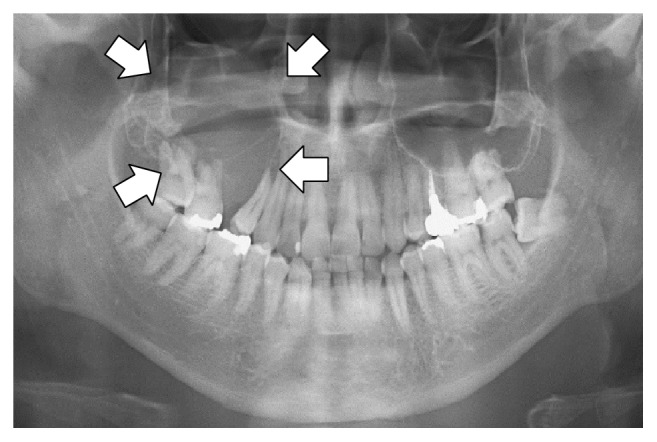

In [ ]:
dataset[0]["image"]

In [ ]:
dataset[0]["caption"]

'Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).'

To format the dataset, all vision finetuning tasks should be formatted as follows:

```python
[
{ "role": "user",
  "content": [{"type": "text",  "text": instruction}, {"type": "image", "image": image} ]
},
{ "role": "assistant",
  "content": [{"type": "text",  "text": answer} ]
},
]
```

We will craft an custom instruction asking the VLM to be an expert radiographer. Notice also instead of just 1 instruction, you can add multiple turns to make it a dynamic conversation.

In [ ]:
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["caption"]} ]
        },
    ]
    return { "messages" : conversation }
pass

Let's convert the dataset into the "correct" format for finetuning:

In [ ]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

The first example is now structured like below:

In [ ]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert radiographer. Describe accurately what you see in this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=657x442>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).'}]}]}

Before we do any finetuning, maybe the vision model already knows how to analyse the images? Let's check if this is the case!

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = cache_train_ds[0]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

KeyError: 'image'

<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

We use our new `UnslothVisionDataCollator` which will help in our vision finetuning setup.

### setup wandb

In [ ]:
!pip install wandb

import wandb
wandb.login()

wandb: Currently logged in as: hellp002 (cryogen) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = train_ds,
    eval_dataset = val_ds,
    #max_steps = 60,
    args = SFTConfig(
        per_device_train_batch_size = 1,
        per_device_eval_batch_size = 1,
        eval_accumulation_steps = 8,
        gradient_accumulation_steps = 8,
        warmup_steps = 10,
        save_strategy = "best",
        save_steps = 50,
        eval_strategy = "steps",
        eval_steps = 50,
        eval_on_start = True,
        num_train_epochs = 4, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "vllm-gemma-3-16k-token-4eph",
        report_to = "wandb",     # For Weights and Biases
        load_best_model_at_end = True,
        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = MAX_SEQ_LENGTH,
    ),
)

In [ ]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA A100-SXM4-40GB. Max memory = 39.557 GB.
4.809 GB of memory reserved.


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 826 | Num Epochs = 4 | Total steps = 412
O^O/ \_/ \    Batch size per device = 1 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (1 x 8 x 1) = 8
 "-____-"     Trainable parameters = 29,802,496/4,000,000,000 (0.75% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Unsloth: Not an error, but Gemma3ForConditionalGeneration does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


Step,Training Loss,Validation Loss
0,No log,2.272238
50,1.976100,1.951231
100,1.866000,1.939587
150,1.862200,1.946957
200,1.738100,1.944252
250,1.848800,1.950065
300,1.812000,1.946684


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss,Validation Loss
0,No log,2.272238
50,1.976100,1.951231
100,1.866000,1.939587
150,1.862200,1.946957
200,1.738100,1.944252
250,1.848800,1.950065
300,1.812000,1.946684
350,1.861700,1.950592
400,1.744300,1.951442


In [ ]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

53344.2092 seconds used for training.
889.07 minutes used for training.
Peak reserved memory = 39.01 GB.
Peak reserved memory for training = 34.201 GB.
Peak reserved memory % of max memory = 98.617 %.
Peak reserved memory for training % of max memory = 86.46 %.


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[0]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

Panoramic radiography shows multiple small osteolytic lesions in the right mandibular ramus, condyle and ascending ramus, the left mandibular condyle, left first molar and body, right first and second premolar, left first, second and third molars (arrows).<|eot_id|>


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("/content/drive/MyDrive/nlp/lora_model_4eph_clean_data")  # Local saving
tokenizer.save_pretrained("/content/drive/MyDrive/nlp/lora_model_4eph_clean_data")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving

['/content/drive/MyDrive/nlp/lora_model_4eph_clean_data/processor_config.json']

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

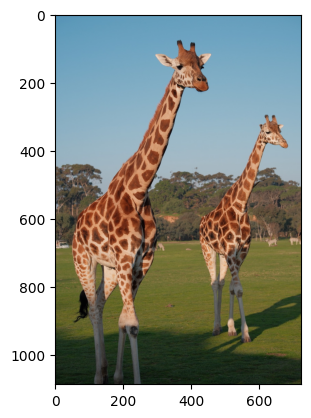

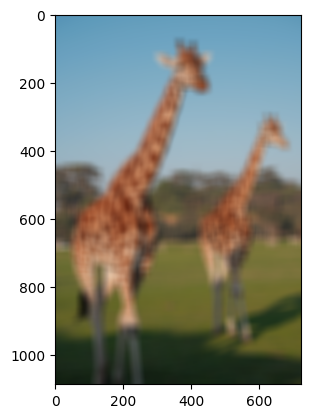

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = np.array(Image.open("/content/visual_grounding_1.jpeg"))
image_blur = cv2.blur(image, (30, 30))
plt.imshow(image)
plt.show()
plt.imshow(image_blur)
plt.show()

In [ ]:
type(image)

numpy.ndarray

In [ ]:
type(dataset[0]["image"])

PIL.PngImagePlugin.PngImageFile

### Inference Model

In [ ]:
MAX_SEQ_LENGTH = 16000

In [ ]:
from pathlib import Path

In [ ]:
model_path = Path("/content/drive/MyDrive/nlp/lora_model_4eph_clean_data")
assert model_path.exists(), f"Path {model_path} does not exist"

In [ ]:
from unsloth import FastVisionModel
model, tokenizer = FastVisionModel.from_pretrained(
    model_name = str(model_path), # YOUR MODEL YOU USED FOR TRAINING
    #load_in_8bit=True,
    load_in_4bit = False, # Set to False for 16bit LoRA
    max_seq_length = MAX_SEQ_LENGTH
)
FastVisionModel.for_inference(model) # Enable for inference!

==((====))==  Unsloth 2025.4.4: Fast Gemma3 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Gemma3ForConditionalGeneration(
      (vision_tower): SiglipVisionModel(
        (vision_model): SiglipVisionTransformer(
          (embeddings): SiglipVisionEmbeddings(
            (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
            (position_embedding): Embedding(4096, 1152)
          )
          (encoder): SiglipEncoder(
            (layers): ModuleList(
              (0-26): 27 x SiglipEncoderLayer(
                (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
                (self_attn): SiglipAttention(
                  (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
                  (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
                  (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
                  (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
                

In [ ]:
def extract_image_from_prompt(prompt):
    user_prompt = prompt
    user_images = [ content["image"] for content in user_prompt["content"] if content["type"] == "image"]
    return user_images



In [ ]:
train_ds_with_no_image = CustomDataset(train_dataset)

In [ ]:
help(model.generate)

Help on method generate in module peft.peft_model:

generate(*args, **kwargs) method of peft.peft_model.PeftModelForCausalLM instance



In [ ]:
from transformers import TextStreamer

class CaptureTextStreamer(TextStreamer):
    def __init__(self, tokenizer, skip_prompt=True, skip_special_tokens=True):
        super().__init__(tokenizer, skip_prompt=skip_prompt, skip_special_tokens=skip_special_tokens)
        self.generated_text = ""

    def on_finalized_text(self, text, stream_end=False):
        self.generated_text += text
        print(text, end="" if not stream_end else None , flush=True)  # Optional: stream to stdout like before

    def get_output_text(self):
        return self.generated_text

In [ ]:
def get_response(message):
    messages = message["messages"]
    user_prompt = messages[0]
    images = extract_image_from_prompt(user_prompt)
    input_text = tokenizer.apply_chat_template([user_prompt], add_generation_prompt = True)
    # check is user prompt
    assert user_prompt["role"] == "user"

    if len(images) > 0:
        inputs = tokenizer(
            images,
            input_text,
            add_special_tokens = False,
            return_tensors = "pt",
        ).to("cuda")
    else:
        inputs = tokenizer(
            input_text,
            add_special_tokens = False,
            return_tensors = "pt",
        ).to("cuda")

    input_length = len(inputs["input_ids"][0])
    print(input_length)

    from transformers import TextStreamer
    text_streamer = CaptureTextStreamer(tokenizer, skip_prompt = True)
    response = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 6000,
                    use_cache = True, temperature = 1.5, min_p = 0.1,do_sample=True)

    #output_response = tokenizer.decode(response[0][input_length:], skip_special_tokens=True)
    #return output_response.strip()
    return text_streamer.get_output_text()

In [ ]:
from tqdm import tqdm
prediction_path = Path("/content/drive/MyDrive/nlp/prediction_with_clean_ds")
if not prediction_path.exists():
    prediction_path.mkdir()

for i in tqdm(range(5,len(cache_test_ds))):
    message = cache_test_ds[i]
    response = get_response(message)
    with open(prediction_path / f"slide_{i}.md", "w") as f:
        f.write(response)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(response)

---

# Fast and Secure Laptop Backups with Encrypted De-duplication Paul Anderson, Le Zhang 1 1 http://www.lisas.ed.ac.uk/lisagroup/dcsp/

- Lisa 2


In [ ]:
response

tensor([[ 105, 2364,  109,  ..., 3342, 3671,  106]], device='cuda:0')

In [ ]:
slide = test_ds.get_extract_text(0)
instuction = f"""Generate slide section from following paper:
{slide}
"""
messages = [
    {"role": "user", "content": [
        {"type": "text", "text": instuction},
    ]}
]
images = []#extract_image_from_prompt(messages)
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
if len(images) > 0:
    inputs = tokenizer(
        images,
        input_text,
        add_special_tokens = False,
        return_tensors = "pt",
    ).to("cuda")
else:
    inputs = tokenizer(
        input_text,
        add_special_tokens = False,
        return_tensors = "pt",
    ).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = MAX_SEQ_LENGTH,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

<start_of_turn>user
Generate slide section from following paper:
Title: Fast and Secure Laptop Backups with Encrypted De-duplication

Authors: Paul Anderson, Le Zhang

Abstract:
Many people now store large quantities of personal and corporate data on laptops or home computers. These often have poor or intermittent connectivity, and are vulnerable to theft or hardware failure. Conventional backup solutions are not well suited to this environment, and backup regimes are frequently inadequate. This paper describes an algorithm which takes advantage of the data which is common between users to increase the speed of backups, and reduce the storage requirements. This algorithm supports client-end per-user encryption which is necessary for confidential personal data. It also supports a unique feature which allows immediate detection of common subtrees, avoiding the need to query the backup system for every file. We describe a prototype implementation of this algorithm for Apple OS X, and pres

KeyboardInterrupt: 

In [ ]:
messages = train_ds_with_no_image[5]["messages"]
images = extract_image_from_prompt(messages)
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
if len(images) > 0:
    inputs = tokenizer(
        images,
        input_text,
        add_special_tokens = False,
        return_tensors = "pt",
    ).to("cuda")
else:
    inputs = tokenizer(
        input_text,
        add_special_tokens = False,
        return_tensors = "pt",
    ).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = MAX_SEQ_LENGTH,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

# Bidding Clubs: Institutionalized Collusion in Auctions
Kevin Leyton-Brown, Yoav Shoham, Moshe Tennenholtz

---

# Infonomics Workshop, Maastricht 2Friday, July 13, 2001

- What kind of intelligent system could help bidders in an auction?
- proxy bidders (eBay, etc.) really just transform English into 2nd-price auction
- automation aggregation of information from different auctions bidding advice, decision support bidding clubs
- instead of helping one user, help a group aggregate bidders market power unlike buyer clubs, bidders interests not aligned
- self-enforcing collusive agreement: increase expected utility

---

# Infonomics Workshop, Maastricht 3Friday, July 13, 2001

- Collusion Example Imagine a first-price auction with 6 bidders, 3 of whom decide to collude in advance
- Is there a pre-agreement that can benefit some, but penalize none?
- Nave proposal: each bidder submits her valuation the two low bidders drop out the bidder with the highest valuation bids lower in the main

In [ ]:
images

[]

In [ ]:
count = 0
for i in range(len(train_ds_with_no_image)):
    messages = train_ds_with_no_image[i]["messages"]
    images = extract_image_from_prompt(messages)
    if len(images) == 0:
        print(i)
    else:
        count += 1
print(count)

5
7
9
11
13
14
20
22
25
63
65
68
71
72
74
75
76
113
131
165
166
174
177
181
184
185
186
215
288
289
297
298
313
314
338
347
349
357
367
368
369
370
410
447
458
459
461
471
483
488
493
498
525
533
539
564
620
623
628
656
674
698
761
770
772
786
798
803
861
870
879
888
899
922
924
933
938
953
962
963
971
986
1000
918


In [ ]:
if False:
    from unsloth import FastVisionModel
    model, tokenizer = FastVisionModel.from_pretrained(
        model_name = str(model_path), # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = False, # Set to False for 16bit LoRA
        max_seq_length = MAX_SEQ_LENGTH
    )
    FastVisionModel.for_inference(model) # Enable for inference!

#image = dataset[0]["image"]
instruction = "Compare these two image"

messages = [
    {"role": "user", "content": [
        {"type": "text", "text": "Image 1"},
        {"type": "image"},

        {"type": "text", "text": "Image 1"},
        {"type": "image"},
        {"type": "text", "text": instruction},
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
print(input_text)
inputs = tokenizer(
    [image,image_blur],
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 512,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

<bos><start_of_turn>user
Image 1<start_of_image>Image 1<start_of_image>Compare these two image<end_of_turn>
<start_of_turn>model

Okay, let's compare the two images.

**Image 1 (Original):**

*   Clearly shows two giraffes standing on the grass, with a blue sky and trees in the background.
*   The giraffes are in focus, allowing you to see details like the pattern on their coats and their long necks.
*   It has good lighting, creating a clear and pleasant visual.



**Image 2 (Blurred):**

*   The same scene with the two giraffes, but it is heavily blurred. The blurring makes it hard to clearly make out their details.

**Here's a summary of the differences and how they relate:**

*   **Clarity:** Image 1 is clear and sharp; Image 2 is completely blurred.
*   **Details:** In Image 1 you can see details; In Image 2 they are almost indiscernible. 


*In conclusion, image 1 is the clear and accurate one of the two!*

Do you want me to look for something specific or compare these in more de

In [ ]:
input_text

'<bos><start_of_turn>user\n<start_of_image>which one is blur image<start_of_image><end_of_turn>\n<start_of_turn>model\n'

In [ ]:
import numpy as np
np.array(image).shape

(442, 657)

### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Select ONLY 1 to save! (Both not needed!)

# Save locally to 16bit
if False: model.save_pretrained_merged("unsloth_finetune", tokenizer,)

# To export and save to your Hugging Face account
if False: model.push_to_hub_merged("YOUR_USERNAME/unsloth_finetune", tokenizer, token = "PUT_HERE")

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/u54VK8m8tk) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>
